In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation
from statsmodels.formula.api import ols
from matplotlib import rc, rcParams
import statsmodels.api as sm
import os
from scipy.ndimage import affine_transform
from scipy.stats import median_test
import matplotlib

import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

Matplotlib is building the font cache; this may take a moment.


In [3]:
volfdlac = pd.read_csv(r"/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/fractal_lac_data.csv")
TGCA_features = pd.read_excel(r"/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/TCGA_LGG_GBM_radiomicFeatures_clinicalDetails.xlsx","Sheet1")

glioma = TGCA_features.merge(volfdlac,left_on = ["ID", "Grade"],right_on = ["ID", "Grade"])
glioma.shape

(159, 759)

In [4]:
glioma.columns.to_list()

['ID',
 'segmented_id',
 'Histology_x',
 'Grade',
 'Age_years_at_diagnosis',
 'Gender',
 'Survival_months',
 'Vital_status_1_dead',
 'Karnofsky Performance Score',
 '1p/19q codeletion',
 'TERT_promoter_status',
 'MGMT_promoter_status',
 'IDH_status',
 'Date',
 'VOLUME_ET',
 'VOLUME_NET',
 'VOLUME_ED',
 'VOLUME_TC',
 'VOLUME_WT',
 'VOLUME_BRAIN',
 'VOLUME_ET_OVER_NET',
 'VOLUME_ET_OVER_ED',
 'VOLUME_NET_OVER_ED',
 'VOLUME_ET_over_TC',
 'VOLUME_NET_over_TC',
 'VOLUME_ED_over_TC',
 'VOLUME_ET_OVER_WT_x',
 'VOLUME_NET_OVER_WT_x',
 'VOLUME_ED_OVER_WT_x',
 'VOLUME_TC_OVER_WT',
 'VOLUME_ET_OVER_BRAIN',
 'VOLUME_NET_OVER_BRAIN',
 'VOLUME_ED_over_BRAIN',
 'VOLUME_TC_over_BRAIN',
 'VOLUME_WT_OVER_BRAIN',
 'DIST_Vent_TC',
 'DIST_Vent_ED',
 'INTENSITY_Mean_ET_T1Gd',
 'INTENSITY_STD_ET_T1Gd',
 'INTENSITY_Mean_ET_T1',
 'INTENSITY_STD_ET_T1',
 'INTENSITY_Mean_ET_T2',
 'INTENSITY_STD_ET_T2',
 'INTENSITY_Mean_ET_FLAIR',
 'INTENSITY_STD_ET_FLAIR',
 'INTENSITY_Mean_NET_T1Gd',
 'INTENSITY_STD_NET_T1Gd',
 

In [5]:
glioma['IDH_status'].value_counts(dropna=False)

IDH_status
WT        87
Mutant    55
NaN       17
Name: count, dtype: int64

In [6]:
df = glioma.dropna(subset='IDH_status')
df2 = df[['ID', 'segmented_id', 'Histology_x', 'Grade', 'Age_years_at_diagnosis', 'Gender', 'Survival_months',
          'Vital_status_1_dead','MGMT_promoter_status', 'IDH_status','ncr_net_meanfd', 'ncr_net_medfd', 'ed_meanfd',
          'ed_medfd', 'et_meanfd', 'et_medfd', 'ncr_net_meanlac', 'ncr_net_medlac', 'ed_meanlac', 'ed_medlac', 'et_meanlac',
          'et_medlac', 'mean_lac', 'med_lac', 'mean_fd', 'med_fd', 'wh_tumour_z_meanfd']]

df3 = df2[df2['Grade'] == 'G4']
# df3.to_csv('gbm_dataset.csv', index=False)

In [7]:
df = glioma.dropna(subset=['Survival_months','IDH_status'])
print('Median of Enhancing FD: ', df['et_meanfd'].median())
print('Median of Non-Enhancing FD: ', df['ncr_net_meanfd'].median())
print('Median of Edema FD: ', df['ed_meanfd'].median())

print('')

print('Mean of Enhancing FD: ', df['et_meanfd'].mean())
print('Mean of Non-Enhancing FD: ', df['ncr_net_meanfd'].mean())
print('Mean of Edema FD: ', df['ed_meanfd'].mean())

print('')

print('Median of Enhancing Lac: ', df['et_meanlac'].median())
print('Median of Non-Enhancing Lac: ', df['ncr_net_meanlac'].median())
print('Median of Edema Lac: ', df['ed_meanlac'].median())

print('')

print('Mean of Enhancing Lac: ', df['et_meanlac'].mean())
print('Mean of Non-Enhancing Lac: ', df['ncr_net_meanlac'].mean())
print('Mean of Edema Lac: ', df['ed_meanlac'].mean())

len(df)

Median of Enhancing FD:  1.095744764
Median of Non-Enhancing FD:  1.271520513
Median of Edema FD:  1.928229823

Mean of Enhancing FD:  0.9782249916028367
Mean of Non-Enhancing FD:  1.211829363219858
Mean of Edema FD:  1.8900176279148937

Median of Enhancing Lac:  2.457826728
Median of Non-Enhancing Lac:  2.142828819
Median of Edema Lac:  1.132882468

Mean of Enhancing Lac:  3.494990596247934
Mean of Non-Enhancing Lac:  2.6432274117304964
Mean of Edema Lac:  1.4862604152142858


141

In [8]:
#Generating final Demographics Table
new_demo = glioma.dropna(subset='IDH_status')
new_demo.columns.to_list()
new_demo2 = new_demo[['ID', 'Gender', 'Histology_x', 'Grade', 'Age_years_at_diagnosis', 'MGMT_promoter_status', 
                      'IDH_status', 'et_meanfd', 'ncr_net_meanfd', 'ed_meanfd', 'et_meanlac', 
                      'ncr_net_meanlac', 'ed_meanlac']]
new_demo2
# new_demo2.to_excel('TCGA_LGG_GBM_New2.xlsx', index = False)

,ID,Gender,Histology_x,Grade,Age_years_at_diagnosis,MGMT_promoter_status,IDH_status,et_meanfd,ncr_net_meanfd,ed_meanfd,et_meanlac,ncr_net_meanlac,ed_meanlac
0,TCGA-CS-4942,female,astrocytoma,G3,44,Unmethylated,Mutant,0.451926,1.205159,1.969199,8.145956,1.172377,0.930206
1,TCGA-CS-4944,male,astrocytoma,G2,50,Methylated,Mutant,0.000000,1.372589,1.968623,NaN,1.350777,0.907962
2,TCGA-CS-5393,male,astrocytoma,G3,39,Methylated,Mutant,0.494171,1.234522,1.997939,8.198241,1.240165,0.807501
3,TCGA-CS-5396,female,oligodendroglioma,G3,53,Methylated,Mutant,1.786606,1.786692,1.421227,1.859892,1.536610,21.471101
4,TCGA-CS-5397,female,astrocytoma,G3,54,Unmethylated,WT,0.000000,1.136512,1.971597,NaN,1.517164,1.032561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,TCGA-76-6657,male,glioblastoma,G4,74,Methylated,WT,1.466034,1.339100,1.949917,1.237903,2.152236,1.217645
155,TCGA-76-6661,male,glioblastoma,G4,54,Unmethylated,WT,1.497297,1.472121,1.838121,1.058993,1.471148,1.243803
156,TCGA-76-6662,male,glioblastoma,G4,58,Unmethylated,WT,0.998445,0.793234,1.893047,2.841400,3.246866,1.222477
157,TCGA-76-6663,female,glioblastoma,G4,44,Unmethylated,WT,1.366130,1.378268,1.992782,2.912593,2.003000,1.660494


## Checking volumetric characteristics

In [9]:
# volfdlac['ncr_net_meanfd'].median()
# df1 = volfdlac[volfdlac['ncr_net_meanfd'] <= 1.261]
# df2 = volfdlac[volfdlac['ncr_net_meanfd'] >= 1.261]

# print(df1['VOLUME_NET_OVER_WT'].mean())
# print(df2['VOLUME_NET_OVER_WT'].mean())

# corr_coeff, p_value = stats.pearsonr(volfdlac['VOLUME_ET_OVER_WT'], volfdlac['et_meanfd'])
# print('Correlation Coefficient', [corr_coeff, p_value])

# corr_coeff, p_value = stats.pearsonr(volfdlac['VOLUME_NET_OVER_WT'], volfdlac['ncr_net_meanfd'])
# print('Correlation Coefficient', [corr_coeff, p_value])

In [10]:
# sns.regplot(data = volfdlac, x = 'VOLUME_NET_OVER_WT', y = 'ncr_net_meanfd', scatter=False)

## Demographics

In [11]:
print(glioma['Age_years_at_diagnosis'].median())
print(glioma['Age_years_at_diagnosis'].max())
print(glioma['Age_years_at_diagnosis'].min())
print('')
print(glioma['Gender'].value_counts())
print('')
print(glioma['Grade'].value_counts())

54.0
84
18

Gender
male      85
female    74
Name: count, dtype: int64

Grade
G4    97
G3    35
G2    27
Name: count, dtype: int64


### Updated Demographics

In [12]:
def demographics(df, x):
    glioma_new = df.dropna(subset= x)
    
    print(glioma_new['Age_years_at_diagnosis'].median())
    print(glioma_new['Age_years_at_diagnosis'].max())
    print(glioma_new['Age_years_at_diagnosis'].min())
    print('')
    print(glioma_new['Gender'].value_counts())
    print('')
    print(glioma_new['Grade'].value_counts())
    print('')
    print(glioma_new['IDH_status'].value_counts())
    print('')
    print(glioma_new['MGMT_promoter_status'].value_counts())

    print('')
    #Gender differences age range
    df_male = glioma_new[glioma_new['Gender'] == 'male']
    df_female = glioma_new[glioma_new['Gender'] != 'male']

    print('Max Age Male: ', df_male['Age_years_at_diagnosis'].max(), 
          'Min Age Male: ', df_male['Age_years_at_diagnosis'].min(),
          'Median Age: ', df_male['Age_years_at_diagnosis'].median())
    
    print('Max Age Female: ', df_female['Age_years_at_diagnosis'].max(), 
          'Min Age Female: ', df_female['Age_years_at_diagnosis'].min(),
          'Median Age: ', df_female['Age_years_at_diagnosis'].median())

demographics(glioma,['IDH_status'])

54.0
84
18

Gender
male      73
female    69
Name: count, dtype: int64

Grade
G4    81
G3    35
G2    26
Name: count, dtype: int64

IDH_status
WT        87
Mutant    55
Name: count, dtype: int64

MGMT_promoter_status
Methylated      74
Unmethylated    45
Name: count, dtype: int64

Max Age Male:  81 Min Age Male:  21 Median Age:  57.0
Max Age Female:  84 Min Age Female:  18 Median Age:  50.0


## Initial Analysis

In [13]:
print("Subjects for whom FD and Lac were calculated:",len(volfdlac))
print("Subjects in TCGA directory:",len(TGCA_features))
print("Merged data length:",len(glioma))

Subjects for whom FD and Lac were calculated: 159
Subjects in TCGA directory: 159
Merged data length: 159


In [14]:
## TGCA ##
print("Number of WT:",len(TGCA_features[TGCA_features["IDH_status"] == "WT"]))
print("Number of Mutants:",len(TGCA_features[TGCA_features["IDH_status"] == "Mutant"]))
print("Number of Methylated:",len(TGCA_features[TGCA_features["MGMT_promoter_status"] == "Methylated"]))
print("Number of Unmethylated:",len(TGCA_features[TGCA_features["MGMT_promoter_status"] == "Unmethylated"]))


Number of WT: 87
Number of Mutants: 55
Number of Methylated: 76
Number of Unmethylated: 48


In [15]:
## glioma ##
print("Number of WT:",len(glioma[glioma["IDH_status"] == "WT"]))
print("Number of Mutants:",len(glioma[glioma["IDH_status"] == "Mutant"]))
print("Number of Methylated:",len(glioma[glioma["MGMT_promoter_status"] == "Methylated"]))
print("Number of Unmethylated:",len(glioma[glioma["MGMT_promoter_status"] == "Unmethylated"]))


Number of WT: 87
Number of Mutants: 55
Number of Methylated: 76
Number of Unmethylated: 48


In [16]:
len(glioma[glioma["IDH_status"] == "WT"]) + len(glioma[glioma["IDH_status"] == "Mutant"])

142

In [17]:
## after dropping subjects who have nan value in calculation of Lacuranity/Fractal Dimension ##

print("Length of glioma:",len(glioma))
print("Number of WT:",len(glioma[glioma["IDH_status"] == "WT"]))
print("Number of Mutants:",len(glioma[glioma["IDH_status"] == "Mutant"]))
print("Number of Methylated:",len(glioma[glioma["MGMT_promoter_status"] == "Methylated"]))
print("Number of Unmethylated:",len(glioma[glioma["MGMT_promoter_status"] == "Unmethylated"]))


Length of glioma: 159
Number of WT: 87
Number of Mutants: 55
Number of Methylated: 76
Number of Unmethylated: 48


In [18]:
IDH = glioma.dropna(subset = ["IDH_status"])
MGMT = glioma.dropna(subset = ["MGMT_promoter_status"])

print("Number of subjects who have IDH Status:",len(IDH))
print("Number of subjects who have MGMT Status:",len(MGMT))

Number of subjects who have IDH Status: 142
Number of subjects who have MGMT Status: 124


In [19]:
print(np.mean(IDH[IDH["IDH_status"] == "WT"]["ncr_net_meanlac"].values))
print(np.mean(IDH[IDH["IDH_status"] == "Mutant"]["ncr_net_meanlac"].values))
print(np.mean(IDH[IDH["IDH_status"] == "WT"]["ncr_net_meanfd"].values))
print(np.mean(IDH[IDH["IDH_status"] == "Mutant"]["ncr_net_meanfd"].values))

3.2750322304137938
1.6488739211636365
1.0791875824367814
1.4174843945454543


In [20]:
print(np.mean(MGMT[MGMT["MGMT_promoter_status"] == "Unmethylated"]["ncr_net_meanlac"].values))
print(np.mean(MGMT[MGMT["MGMT_promoter_status"] == "Methylated"]["ncr_net_meanlac"].values))
print(np.mean(MGMT[MGMT["MGMT_promoter_status"] == "Unmethylated"]["ncr_net_meanfd"].values))
print(np.mean(MGMT[MGMT["MGMT_promoter_status"] == "Methylated"]["ncr_net_meanfd"].values))

3.1424826826875
2.0682969729473686
1.0747088390416666
1.340075384618421


In [21]:
cols_fd  = ['ncr_net_meanfd','ncr_net_medfd', 'ed_meanfd', 'ed_medfd', 'et_meanfd', 'et_medfd', 'mean_fd', 'med_fd']

glioma_lac_edited = glioma.dropna(subset=['ncr_net_meanlac', 'et_meanlac', 'ed_meanlac'])
cols_lac = ['ncr_net_meanlac','ncr_net_medlac','ed_meanlac', 'ed_medlac','et_meanlac', 'et_medlac','mean_lac', 'med_lac']

median_fd = []
median_lac = []

for c in cols_fd:
    m = np.median(glioma[c].values)
    median_fd = np.append(median_fd,m)
print(median_fd)

net_median_fd = median_fd[0]
print(net_median_fd)
et_median_fd = median_fd[4]
print(et_median_fd)
ed_median_fd = median_fd[2]


for d in cols_lac:
    m = np.median(glioma_lac_edited[d].values)
    median_lac = np.append(median_lac,m)
print(median_lac)

net_median_lac = median_lac[0]
print(net_median_lac)
et_median_lac = median_lac[4]
print(et_median_lac)
ed_median_lac = median_lac[2]

[1.26112304 1.75883266 1.93121309 1.99551098 1.10403325 1.68044027
 1.90071905 1.92724463]
1.26112304
1.104033248
[2.36252765 1.72129305 1.09049559 0.97853199 2.34001791 1.52112349
        nan        nan]
2.362527653
2.3400179055


In [22]:
print([net_median_fd, et_median_fd, ed_median_fd])
print([net_median_lac, et_median_lac, ed_median_lac])

[1.26112304, 1.104033248, 1.931213087]
[2.362527653, 2.3400179055, 1.0904955945]


In [23]:
#grades and relation on mean FD values of each tumour subcomponent with grade
print(len(glioma[glioma['Grade'] == 'G2']))
print(len(glioma[glioma['Grade'] == 'G3']))
print(len(glioma[glioma['Grade'] == 'G4']))

27
35
97


In [24]:
dfa = glioma[glioma['Grade'] == 'G2']
dfb = glioma[glioma['Grade'] == 'G3']
dfc = glioma[glioma['Grade'] == 'G4']

In [25]:
print(dfa['et_meanfd'].median())
print(dfb['et_meanfd'].median())
print(dfc['et_meanfd'].median())

0.075157977
0.541161821
1.366129983


In [26]:
a = np.array(dfb['et_meanfd'])
b = np.array(dfc['et_meanfd'])
print(type(a))
print(type(b))
U1, p = mannwhitneyu(a, b)
print(p)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1.627622249671018e-10


In [27]:
df_gbm = glioma[glioma['Grade'] == 'G4']
df_gbm['IDH_status'].value_counts(dropna=False)

IDH_status
WT        77
NaN       16
Mutant     4
Name: count, dtype: int64

~Checking survival of Lower grade and higher grade using curves~

## Survival Initial Analysis

In [28]:
df_g2 = glioma[glioma['Grade'] == 'G2']
df_g3 = glioma[glioma['Grade'] == 'G3']
df_g4 = glioma[glioma['Grade'] == 'G4']
df_g23 = glioma[glioma['Grade'] != 'G4']

print(df_g2['Survival_months'].median())
print(df_g3['Survival_months'].median())
print('Grade 4 median survival: ',df_g4['Survival_months'].median())
print('Lower grade median survival: ',df_g23['Survival_months'].median())

print('')
print(glioma['Survival_months'].min())
print(glioma['Survival_months'].max())

16.5260147
14.5875756
Grade 4 median survival:  10.79283465
Lower grade median survival:  15.4089481

0.0985647
156.1264848


In [29]:
#From log rank test - FD
df = glioma.dropna(subset = ['IDH_status', 'Survival_months'])

df_en_low = df[df['et_meanfd'] <= 0.69]
df_en_high = df[df['et_meanfd'] >= 0.69]
print((df_en_low['Survival_months']), len(df_en_high))

print(df_en_low['Survival_months'].median(), df_en_high['Survival_months'].median())
print(df_en_low['Survival_months'].mean() - df_en_high['Survival_months'].mean())

df_nen_low = df[df['ncr_net_meanfd'] <= 1.2]
df_nen_high = df[df['ncr_net_meanfd'] >= 1.2]

print(df_nen_low['Survival_months'].mean(), df_nen_high['Survival_months'].mean())
print(df_nen_low['Survival_months'].mean() - df_nen_high['Survival_months'].mean())

df_ed_low = df[df['ed_meanfd'] <= 1.8]
df_ed_high = df[df['ed_meanfd'] >= 1.8]

print(df_ed_low['Survival_months'].median(), df_ed_high['Survival_months'].median())
print(df_ed_low['Survival_months'].mean() - df_ed_high['Survival_months'].mean())

0      43.861292
1      10.612133
2      40.148688
4       6.373851
6      23.819803
7      12.419152
8       8.476564
9       8.016596
10      7.392353
15     15.146109
18    156.126485
19     14.981834
23     26.283920
26     43.992711
27     61.964341
28     25.889661
29     60.255887
32      2.759812
33     14.587576
34     21.388540
35     16.953128
36     15.474658
39     15.113254
40      4.961090
41      3.646894
42      5.651043
43      7.228078
44      5.979592
46     14.916125
47     23.951222
49     15.343238
50     16.526015
51     29.832249
52      0.755663
53     42.711370
55      6.899529
56      3.679749
57     11.269231
58     21.487105
61      6.373851
80     27.006728
Name: Survival_months, dtype: float64 100
15.113254 12.0248934
4.458313769317076
18.157286560317463 19.311099300000002
-1.1538127396825395
15.1461089 12.36986985
-0.080774877343746


In [30]:
#From log rank test - Lac
df = glioma.dropna(subset = ['IDH_status', 'Survival_months', 
                             'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac'])

df_en_low = df[df['et_meanlac'] <= 3.52]
df_en_high = df[df['et_meanlac'] >= 3.52]

print(df_en_low['Survival_months'].mean(), df_en_high['Survival_months'].mean())
print(df_en_low['Survival_months'].mean() - df_en_high['Survival_months'].mean())

df_nen_low = df[df['ncr_net_meanlac'] <= 1.48]
df_nen_high = df[df['ncr_net_meanlac'] >= 1.48]

print(df_nen_low['Survival_months'].mean(), df_nen_high['Survival_months'].mean())
print(df_nen_low['Survival_months'].mean() - df_nen_high['Survival_months'].mean())

df_ed_low = df[df['ed_meanlac'] <= 0.97]
df_ed_high = df[df['ed_meanlac'] >= 0.97]

print(df_ed_low['Survival_months'].mean(), df_ed_high['Survival_months'].mean())
print(df_ed_low['Survival_months'].mean() - df_ed_high['Survival_months'].mean())

15.428417670370372 23.302548433333335
-7.874130762962963
23.322000984848483 15.964082617241381
7.357918367607102
15.64098583125 19.551859726388887
-3.910873895138888


## Survival Analysis Based on Cutoffs

### FD

In [43]:
df_s = glioma.dropna(subset='IDH_status')

#For FD - Median
print('For FD_Median')
df_sl = df_s[df_s['et_meanfd'] <= 1.1]
df_sh = df_s[df_s['et_meanfd'] > 1.1]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ncr_net_meanfd'] <= 1.3]
df_sh = df_s[df_s['ncr_net_meanfd'] > 1.3]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ed_meanfd'] <= 1.9]
df_sh = df_s[df_s['ed_meanfd'] > 1.9]

print(len(df_sl), len(df_sh))

#For FD - Mean
print('\nFor FD_Mean')
df_sl = df_s[df_s['et_meanfd'] <= 1]
df_sh = df_s[df_s['et_meanfd'] > 1]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ncr_net_meanfd'] <= 1.2]
df_sh = df_s[df_s['ncr_net_meanfd'] > 1.2]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ed_meanfd'] <= 1.9]
df_sh = df_s[df_s['ed_meanfd'] > 1.9]

print(len(df_sl), len(df_sh))

#For FD - Log Rank
print('\nFor FD_Log Rank')
df_sl = df_s[df_s['et_meanfd'] <= 0.7]
df_sh = df_s[df_s['et_meanfd'] > 0.7]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ncr_net_meanfd'] <= 1.2]
df_sh = df_s[df_s['ncr_net_meanfd'] > 1.2]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ed_meanfd'] <= 1.8]
df_sh = df_s[df_s['ed_meanfd'] > 1.8]

print(len(df_sl), len(df_sh))

For FD_Median
72 70
77 65
52 90

For FD_Mean
61 81
64 78
52 90

For FD_Log Rank
42 100
64 78
13 129


### Lac

In [ ]:
df_l_et = glioma.dropna(subset=['IDH_status', 'et_meanlac'])
df_l_net = glioma.dropna(subset=['IDH_status', 'ncr_net_meanlac'])
df_l_ed = glioma.dropna(subset=['IDH_status', 'ed_meanlac'])

#For Lac - Median
print('For FD_Median')
df_sl = df_l_et[df_l_et['et_meanfd'] <= 1.1]
df_sh = df_l_et[df_l_et['et_meanfd'] > 1.1]

print(len(df_sl), len(df_sh))

df_sl = df_[df_s['ncr_net_meanfd'] <= 1.3]
df_sh = df_s[df_s['ncr_net_meanfd'] > 1.3]

print(len(df_sl), len(df_sh))

df_sl = df_s[df_s['ed_meanfd'] <= 1.9]
df_sh = df_s[df_s['ed_meanfd'] > 1.9]

print(len(df_sl), len(df_sh))

## Statistical Analysis

### Enhancing fraction Numbers

In [36]:
df = glioma.dropna(subset = 'IDH_status')

df1 = df[df['VOLUME_ET'] == 0]
print(df1['Grade'].value_counts())

df2 = df[df['VOLUME_NET'] == 0]
print(df2['Grade'].value_counts())

df3 = df[df['VOLUME_ED'] == 0]
df3['Grade'].value_counts()

Grade
G2    13
G3     7
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


Grade
G3    1
Name: count, dtype: int64

## Median test and Density Plots

In [19]:
glioma2 = glioma.dropna(subset='IDH_status')
print(glioma2['ncr_net_meanfd'].median(), glioma2['et_meanfd'].median(), glioma2['ed_meanfd'].median(), len(glioma2))

df_wt = glioma[glioma['IDH_status'] == 'WT']
df_mut = glioma[glioma['IDH_status'] == 'Mutant']

print(df_wt['ncr_net_meanfd'].median(), df_wt['et_meanfd'].median(), df_wt['ed_meanfd'].median())
print(df_mut['ncr_net_meanfd'].median(), df_mut['et_meanfd'].median(), df_mut['ed_meanfd'].median())
print('')
print('Non_enhancing: ', glioma2['ncr_net_meanfd'].median() - df_mut['ncr_net_meanfd'].median(), glioma2['ncr_net_meanfd'].median() - df_wt['ncr_net_meanfd'].median())
print('Enhancing: ', glioma2['et_meanfd'].median() - df_mut['et_meanfd'].median(), glioma2['et_meanfd'].median() - df_wt['et_meanfd'].median())
print('Edema: ', glioma2['ed_meanfd'].median() - df_mut['ed_meanfd'].median(), glioma2['ed_meanfd'].median() - df_wt['ed_meanfd'].median())

1.2690777364999999 1.0976533215 1.9289594355 142
1.128704535 1.278996284 1.923493019
1.480884053 0.525136217 1.932794791

Non_enhancing:  -0.21180631650000015 0.14037320149999988
Enhancing:  0.5725171044999999 -0.18134296250000004
Edema:  -0.003835355500000137 0.005466416500000015


### Density Plots of Total IDH Population

In [62]:
dp_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Density_plots/' #save path

Net Median: 1.26112304


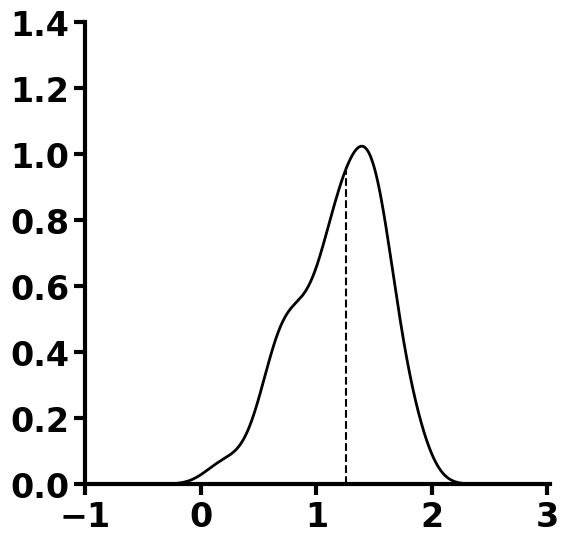

In [63]:
# x="Fractal Dimension of Necrosis fraction", y= density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ncr_net_meanfd.plot.density(color = "black",linewidth=2)
plt.vlines(net_median_fd,0.0,0.96,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.4])
print("Net Median:",net_median_fd)
#plt.savefig(dp_path + "Density_of_NET_FD.tiff",bbox_inches = "tight",dpi = 300)

ET Median: 1.104033248


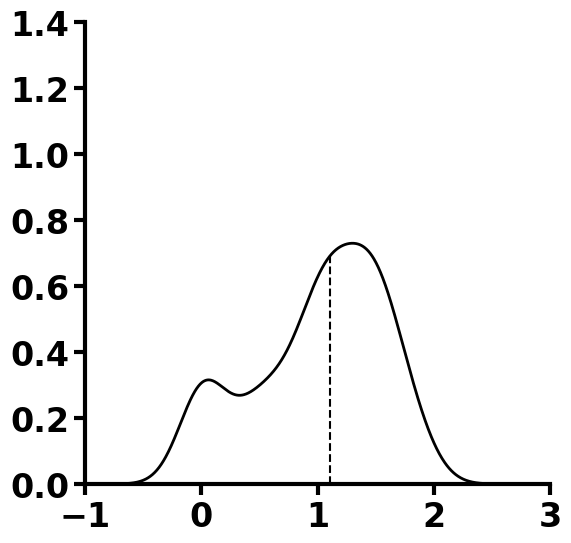

In [64]:
# xlabel= Fractal Dimension of Enhancing fraction, ylabel=DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_fd,0.0,0.7,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim(-1,3)
print("ET Median:",et_median_fd)
#plt.savefig(dp_path + "Density of ET_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.931213087


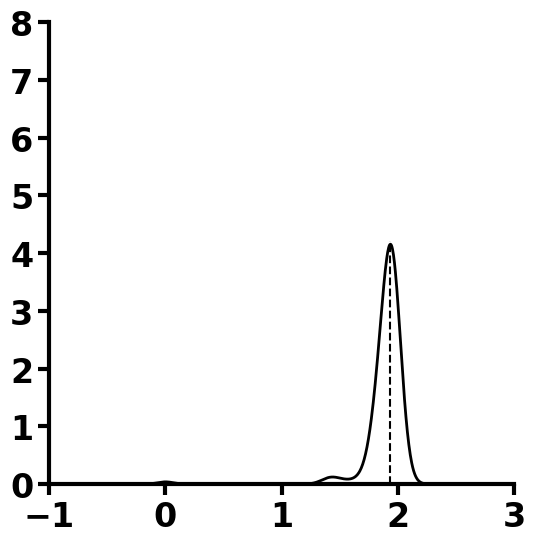

In [65]:
# "Fractal Dimension of Edema fraction", y label = Density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ed_meanfd.plot.kde(color = "black",linewidth=2)
plt.vlines(ed_median_fd,0.0,4.2,linestyles = "dashed",colors = "black")
plt.xlabel('',fontsize = 20, fontweight = "bold")
plt.ylabel('',fontsize = 20, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,8])
plt.xlim(-1,3)

print("ED Median:",ed_median_fd)
#plt.savefig(dp_path + "Density of ED_FD.tiff",dpi = 300,bbox_inches = "tight")

Net Median: 2.362527653


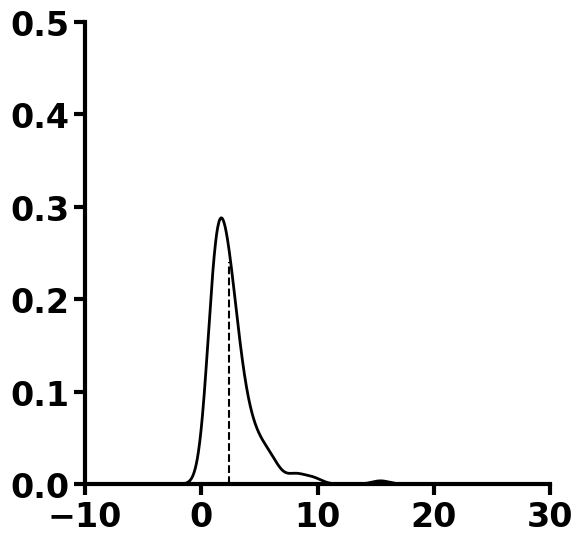

In [66]:
#xlabel= Lacuranity of Necrosis fraction, ylabel= density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ncr_net_meanlac.plot.density(color = "black",linewidth=2)
net_median_lac = np.median(glioma_lac_edited["ncr_net_meanlac"].values)
plt.vlines(net_median_lac,0.0,0.24,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 20, fontweight = "bold")
plt.ylabel("",fontsize = 20, fontweight = "bold")
plt.xticks(np.arange(-10, 31, 10),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.5])
print("Net Median:",net_median_lac)
#plt.savefig(dp_path + "Density of NET_lac.tiff",bbox_inches = "tight",dpi = 300)

ET Median: 2.3400179055


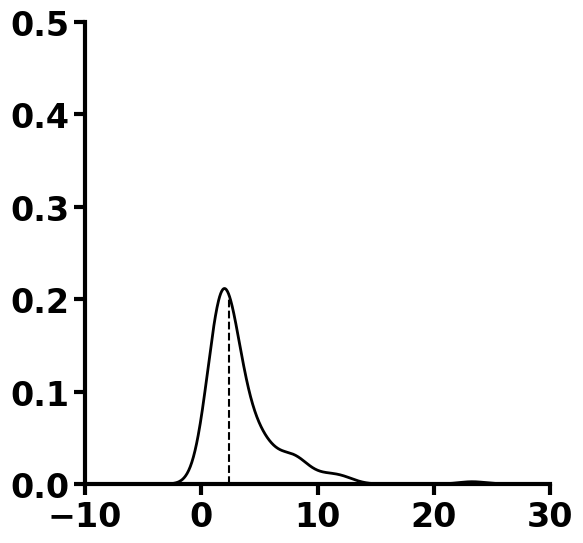

In [67]:
# xlabel=Lacuranity of Enhancing fraction , ylabel=Density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.et_meanlac.plot.density(color = "black",linewidth=2)
et_median_lac = np.median(glioma_lac_edited["et_meanlac"].values)
plt.vlines(et_median_lac,0.0,0.20,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 20, fontweight = "bold")
plt.ylabel("",fontsize = 20, fontweight = "bold")
plt.xticks(np.arange(-10, 31, 10),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim([-10,30])
print("ET Median:",et_median_lac)
#plt.savefig(dp_path + "Density of ET_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.0904955945


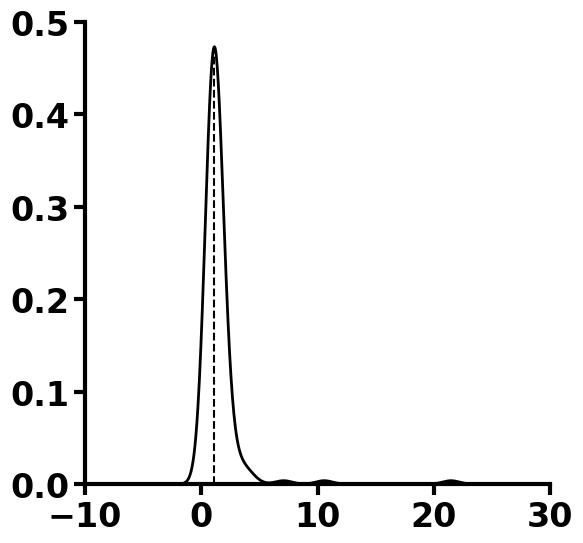

In [68]:
#"Lacunarity of Edema fraction", y label = Density
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
glioma.ed_meanlac.plot.density(color = "black", linewidth=2)
ed_median_lac = np.median(glioma_lac_edited["ed_meanlac"].values)
plt.vlines(ed_median_lac,0.0,0.47,linestyles = "dashed",colors = "black")
# plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-10, 31, 10),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-10,30)
print("ED Median:",ed_median_lac)
#plt.savefig(dp_path + "Density of ED_lac.tiff",dpi = 300,bbox_inches = "tight")

### Density plots of FD and Lac of IDH mutant and WT status

In [69]:
IDH_WT = glioma[glioma["IDH_status"] == "WT"]
IDH_MT = glioma[glioma["IDH_status"] == "Mutant"]
print(f'IDH WT: {len(IDH_WT)}', f'IDH Mutant: {len(IDH_MT)}')

IDH WT: 87 IDH Mutant: 55


### Wildtype

Net Median: 1.128704535


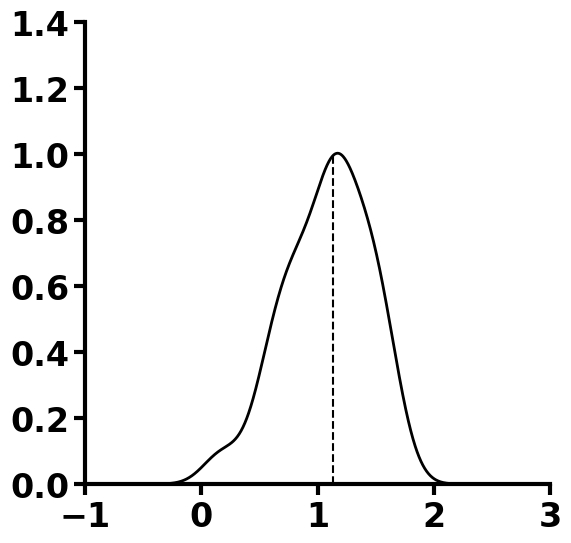

In [70]:
# WILDTYPE, Fractal Dimension of Necrosis fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_WT = np.median(IDH_WT["ncr_net_meanfd"].values)
IDH_WT.ncr_net_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_WT,0.0,1,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0,1.4])
plt.xlim([-1,3])
print("Net Median:",net_median_WT)
#plt.savefig(dp_path + "Density of NET_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 1.278996284


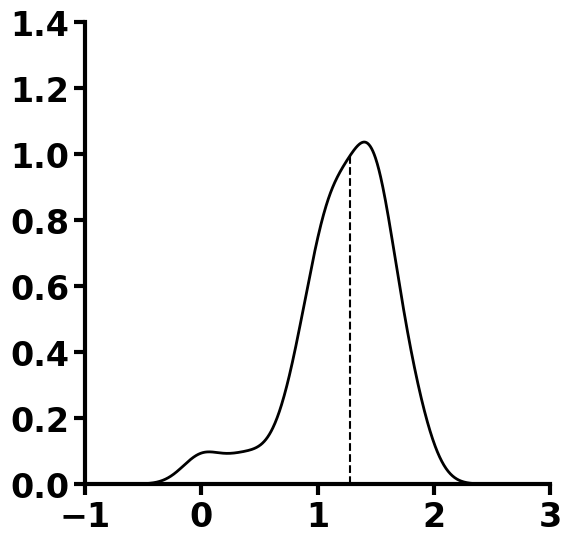

In [71]:
# WILDTYPE, Fractal Dimension of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_WT = np.median(IDH_WT["et_meanfd"].values)
IDH_WT.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_WT,0.0,1,linestyles = "dashed",colors = "black")

plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.4])
plt.xlim([-1,3])
print("ET Median:",et_median_WT)
#plt.savefig(dp_path + "Density of ET_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.923493019


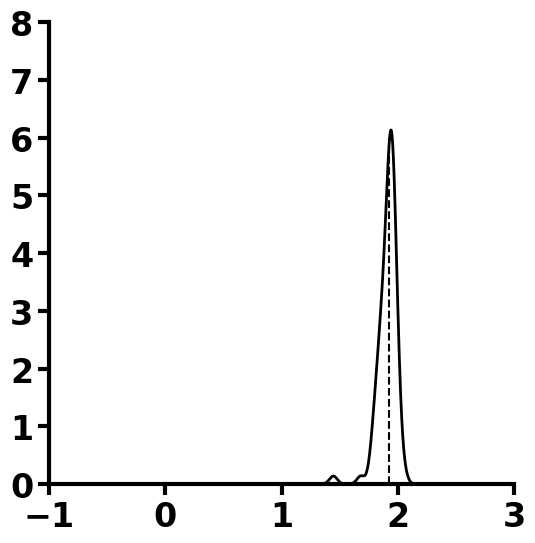

In [72]:
# WILDTYPE, Fractal Dimension of Edema fraction DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_WT = np.median(IDH_WT["ed_meanfd"].values)
IDH_WT.ed_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_WT,0.0,6,linestyles = "dashed",colors = "black")

plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,8.0])
print("ED Median:",ed_median_WT)

# plt.xlim(-1, 3)
#plt.savefig(dp_path + "Density of ED_WILDTYPE_FD.tiff",dpi = 300,bbox_inches = "tight")

In [73]:
IDHWT_lac_net = IDH_WT.dropna(subset='ncr_net_meanlac')
IDHWT_lac_et = IDH_WT.dropna(subset='et_meanlac')
IDHWT_lac_ed = IDH_WT.dropna(subset='ed_meanlac')

print(f'IDH_WT_net:{len(IDHWT_lac_net)}', f'IDH_WT_et:{len(IDHWT_lac_et)}', f'IDH_WT_ed:{len(IDHWT_lac_ed)}')

IDH_WT_net:87 IDH_WT_et:84 IDH_WT_ed:87


Net Median: 2.681740792


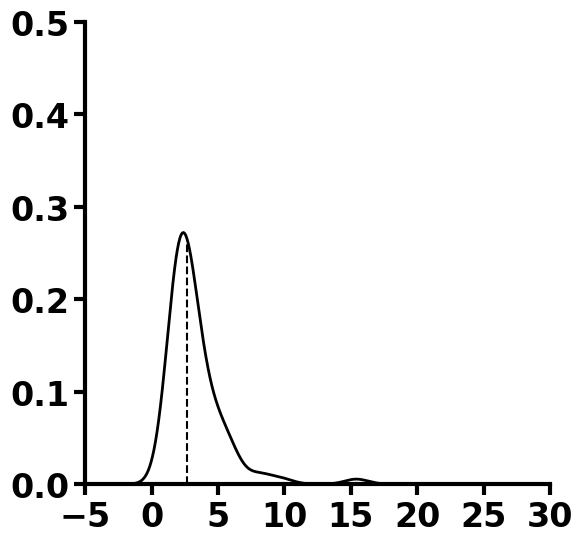

In [74]:
# WILDTYPE,  Lacuranity of Necrosis fraction, DENSITY

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_WT = np.median(IDHWT_lac_net["ncr_net_meanlac"].values)
IDH_WT.ncr_net_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_WT,0.0,0.265,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-5,31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim(-5, 30)

print("Net Median:",net_median_WT)
# plt.savefig(dp_path + "Density of NET_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 1.9970563590000001


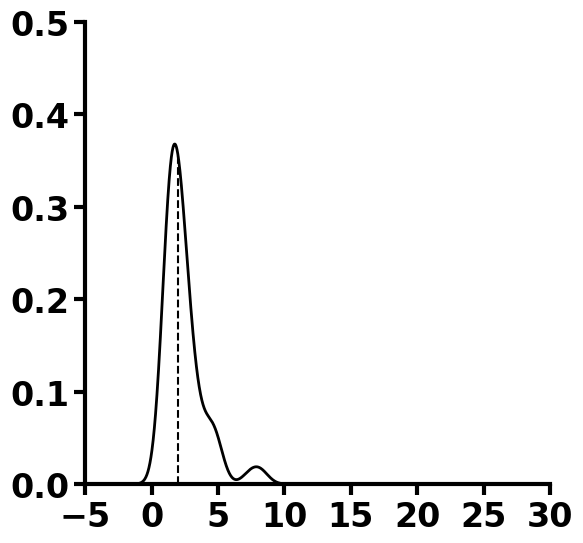

In [75]:
# WILDTYPE, Lacuranity of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_WT = np.median(IDHWT_lac_et["et_meanlac"].values)
IDH_WT.et_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_WT,0.0,0.358,linestyles = "dashed",colors = "black")

plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-5, 31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.5])
plt.xlim([-5,30])
print("ET Median:",et_median_WT)
# plt.savefig(dp_path + "Density of ET_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.070617936


(-5.0, 30.0)

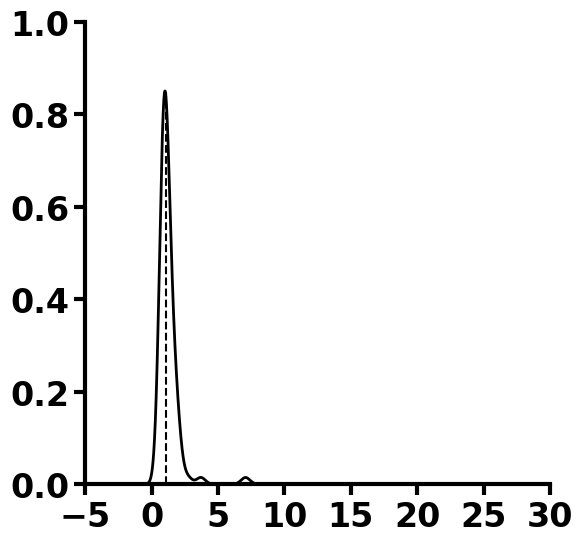

In [76]:
# WILDTYPE, Lacuranity of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_WT = np.median(IDHWT_lac_ed["ed_meanlac"].values)
IDH_WT.ed_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_WT,0.0,0.849,linestyles = "dashed",colors = "black")

plt.xlabel("",fontsize = 25, fontweight = "bold")
plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-5, 31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.0])
print("ED Median:",ed_median_WT)

plt.xlim([-5 ,30])
# plt.savefig(dp_path + "Density of ED_WILDTYPE_lac.tiff",dpi = 300,bbox_inches = "tight")

### Mutant

NET Median: 1.480884053


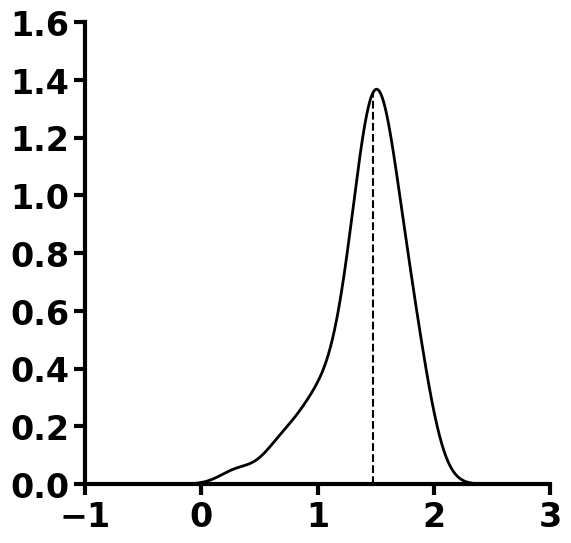

In [77]:
# MUTANT, Fractal Dimension of Necrosis fraction, DENSITY

plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_Mutant = np.median(IDH_MT["ncr_net_meanfd"].values)
IDH_MT.ncr_net_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_Mutant,0.0,1.35,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.6])
# plt.xlim(-1, 3)
print("NET Median:",net_median_Mutant)
#plt.savefig(dp_path + "Density of NET_MUTANT_FD.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 0.525136217


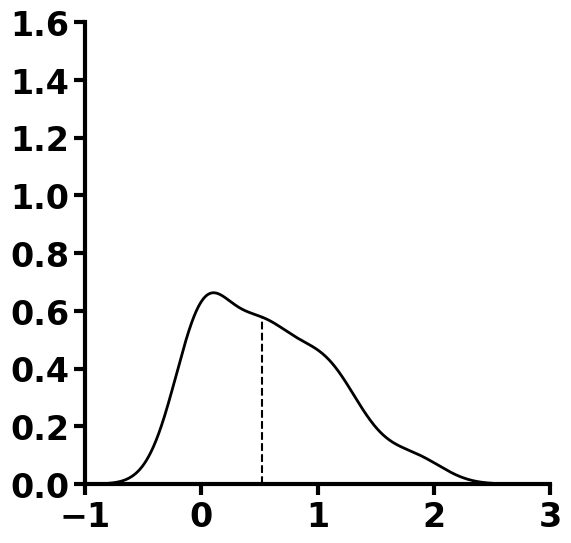

In [78]:
# MUTANT, Fractal Dimension of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_Mutant = np.median(IDH_MT["et_meanfd"].values)
IDH_MT.et_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_Mutant,0.0,0.582,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-1,4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,1.6])
plt.xlim(-1, 3)
print("ET Median:",et_median_Mutant)
#plt.savefig(dp_path + "Density of ET_Mutant_FD.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.932794791


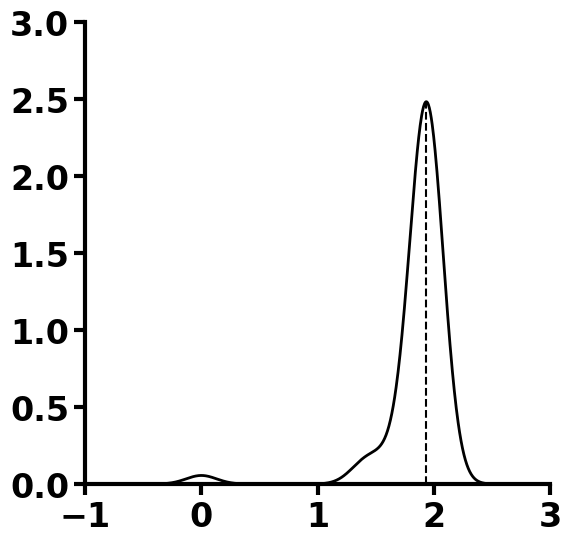

In [79]:
# MUTANT, Fractal Dimension of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_Mutant = np.median(IDH_MT["ed_meanfd"].values)
IDH_MT.ed_meanfd.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_Mutant,0.0,2.49,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30,fontweight = "bold")
plt.xticks(np.arange(-1, 4, 1),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,3])
plt.xlim(-1, 3)
print("ED Median:",ed_median_Mutant)
#plt.savefig(dp_path + "Density of ED_Mutant_FD.tiff",dpi = 300,bbox_inches = "tight")

In [80]:
IDHMT_lac_net = IDH_MT.dropna(subset='ncr_net_meanlac')
IDHMT_lac_et = IDH_MT.dropna(subset='et_meanlac')
IDHMT_lac_ed = IDH_MT.dropna(subset='ed_meanlac')

print(f'IDH_MT_net:{len(IDHMT_lac_net)}', f'IDH_MT_et:{len(IDHMT_lac_et)}', f'IDH_MT_ed:{len(IDHMT_lac_ed)}')

IDH_MT_net:55 IDH_MT_et:38 IDH_MT_ed:54


NET Median: 1.240165324


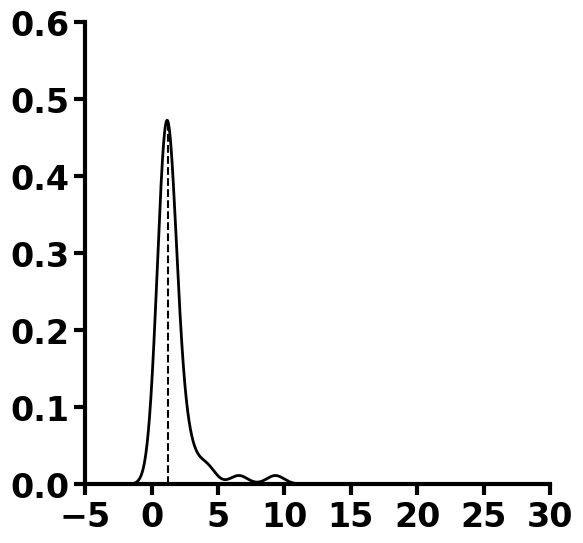

In [81]:
# MUTANT, Lacuranity of Necrosis fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
net_median_Mutant = np.median(IDHMT_lac_net["ncr_net_meanlac"].values)
IDH_MT.ncr_net_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(net_median_Mutant,0.0,0.47,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-5, 31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.6])
# plt.xlim(-5, 20)
print("NET Median:",net_median_Mutant)
#plt.savefig(dp_path + "Density of NET_MUTANT_lac.tiff",dpi = 300,bbox_inches = "tight")

ET Median: 5.6320547405


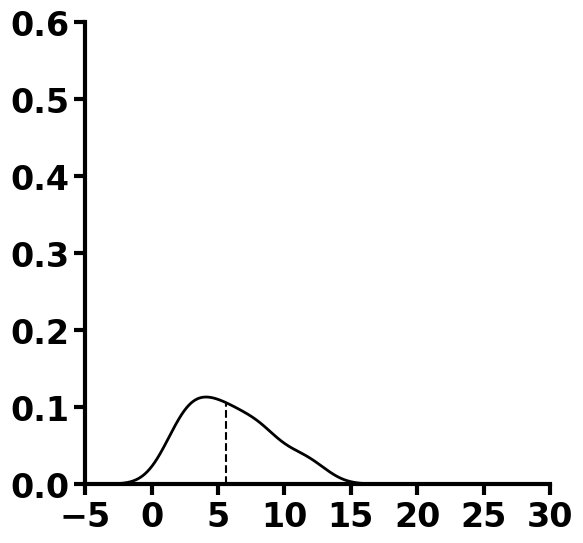

In [82]:
# MUTANT, Lacuranity of Enhancing fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
et_median_Mutant = np.median(IDHMT_lac_et["et_meanlac"].values)
IDH_MT.et_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(et_median_Mutant,0.0,0.105,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30, fontweight = "bold")
plt.xticks(np.arange(-5, 31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.6])
plt.xlim([-5,30])
print("ET Median:",et_median_Mutant)
#plt.savefig(dp_path + "Density of ET_Mutant_lac.tiff",dpi = 300,bbox_inches = "tight")

ED Median: 1.2649266295000001


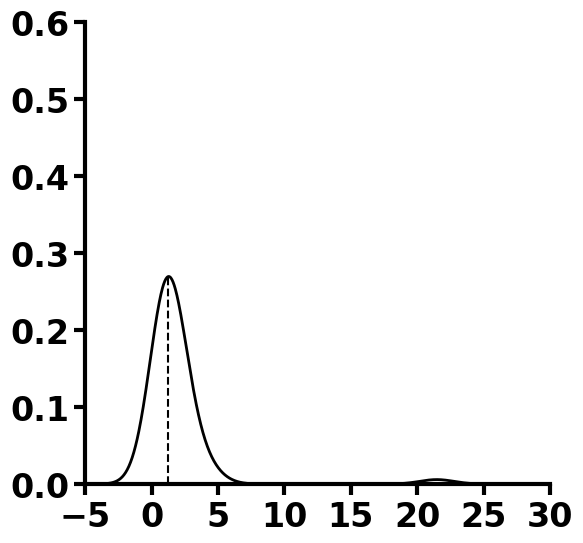

In [83]:
# MUTANT, Lacuranity of Edema fraction, DENSITY
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
ed_median_Mutant = np.median(IDHMT_lac_ed["ed_meanlac"].values)
IDH_MT.ed_meanlac.plot.density(color = "black", linewidth=2)
plt.vlines(ed_median_Mutant,0.0,0.27,linestyles = "dashed",colors = "black")
plt.xlabel("",fontsize = 25, fontweight = "bold")

plt.ylabel("",fontsize = 30,fontweight = "bold")
plt.xticks(np.arange(-5, 31, 5),size = 24,weight = "bold")
plt.yticks(size = 24,weight = "bold")
plt.ylim([0.0,0.6])
plt.xlim(-5, 30)
print("ED Median:",ed_median_Mutant)
#plt.savefig(dp_path + "Density of ED_Mutant_lac.tiff",dpi = 300,bbox_inches = "tight")

In [84]:
hp_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Histogram Plots/' #save path

### Total Population

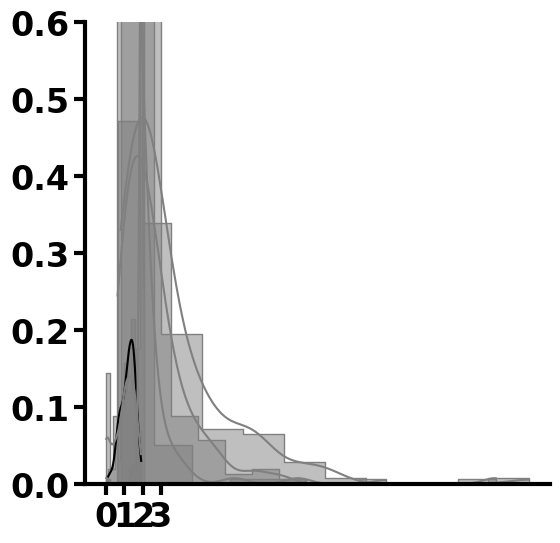

In [100]:
# FD Necrosis 
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
plt.figure(figsize = (6,6))
for name in total_pop:
    ax = sns.histplot(data = glioma, x = name, bins=10, color='gray', kde=True, 
                      stat='probability', element='step')
    ax.lines[0].set_color('black')
    # plt.vlines(net_median_fd,0.0,0.196,linestyles = "dashed",colors = "black")
    plt.xlabel('',fontsize = 20, fontweight = "bold")
    plt.ylabel('',fontsize = 20, fontweight = "bold")
    plt.xticks(np.arange(0, 4, 1),size = 24,weight = "bold")
    plt.yticks(size = 24,weight = "bold")
    plt.ylim([0.0,0.6])
    # plt.xlim(0,2)
    # print("Net Median:",IDH_WT['ed_meanfd'].median())
# plt.savefig('/home/ankit/Desktop/'+ "test3.tiff",bbox_inches = "tight",dpi = 300)

In [84]:
vp_plot = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Violin_plots_new/'

### IDH

<Axes.ArtistList of 4 collections>
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=8.307e-08 U_stat=3.673e+03


/tmp/ipykernel_24880/4076682783.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"}) #to get the limit of y axis


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79abaf2b0>])

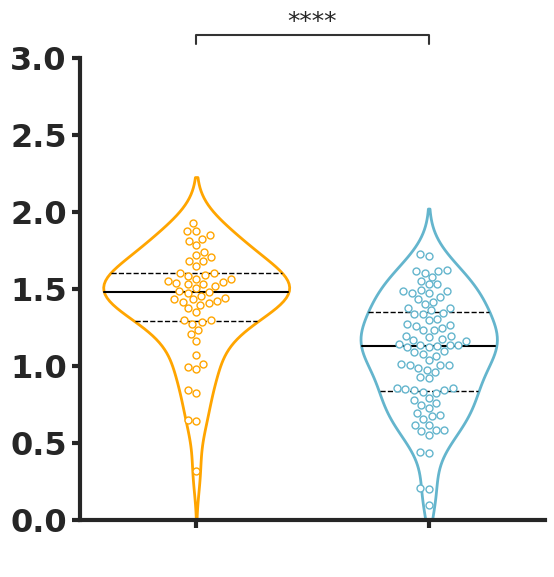

In [85]:
#FD of Necrotic Component, ["Mutant","Wildtype"]
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))


ax=sns.violinplot(x = 'IDH_status' , y = 'ncr_net_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, scale ='area',
                  color="White",dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")
sns.swarmplot(x = 'IDH_status' , y = 'ncr_net_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel("", size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"}) #to get the limit of y axis
# ax.set_yticklabels(np.arange(0, 4, 1), size = 23, fontdict = {"weight" : "bold"})

for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  
print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "IDH_status"
y1 = "ncr_net_meanfd"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_NCR_FD_violin.tiff",dpi = 300,bbox_inches = "tight")


<Axes.ArtistList of 4 collections>
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=1.700e-13 U_stat=6.320e+02


/tmp/ipykernel_24880/2048776716.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79f7e5810>])

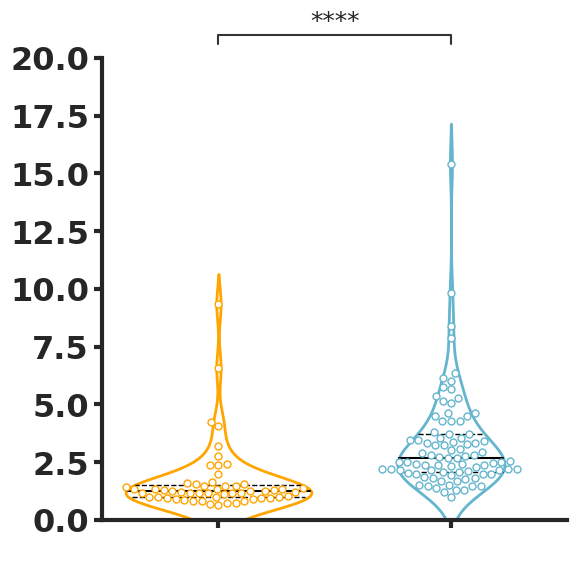

In [86]:
# Lacuranity of Necrotic Component, IDH_status

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ncr_net_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ncr_net_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel("", size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,20])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "IDH_status"
y1 = "ncr_net_meanlac"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_NCR_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')

<Axes.ArtistList of 4 collections>
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=6.510e-11 U_stat=8.345e+02


/tmp/ipykernel_24880/4222598907.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79f7365c0>])

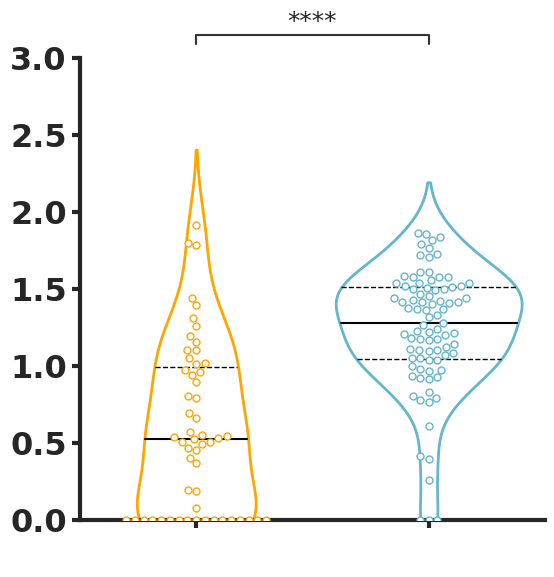

In [87]:
#FD of Enhancing Component, 
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'et_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'et_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "IDH_status"
y1 = "et_meanfd"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_ET_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=8.717e-11 U_stat=2.770e+03


/tmp/ipykernel_24880/2545840234.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79af4b400>])

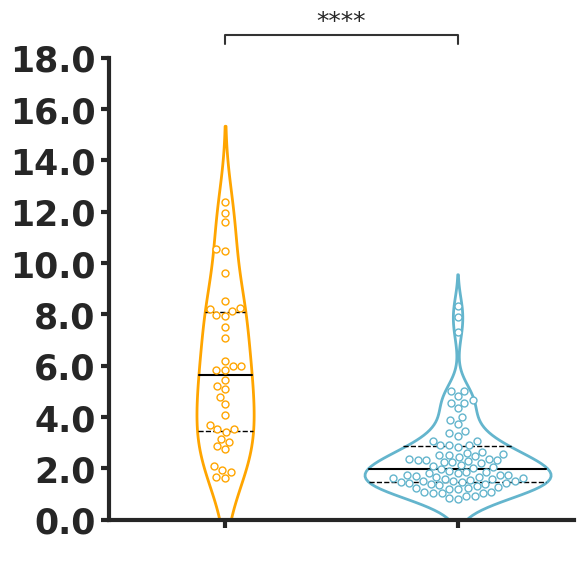

In [88]:
#Lacuranity of Enhancing Component, 
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'et_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'et_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim(0,18)
ax.set_yticklabels(ax.get_yticks(), size = 25, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

# print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])


x1 = "IDH_status"
y1 = "et_meanlac"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_ET_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=5.437e-01 U_stat=2.538e+03


/tmp/ipykernel_24880/1749672567.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})
/home/ankit/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79ade4040>])

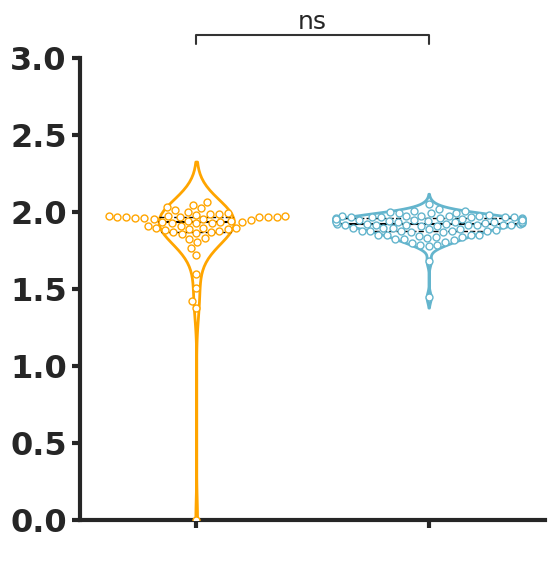

In [89]:
# FD of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ed_meanfd',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ed_meanfd',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("Black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("Black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "IDH_status"
y1 = "ed_meanfd"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_ED_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


<Axes.ArtistList of 4 collections>
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mutant v.s. WT: Mann-Whitney-Wilcoxon test two-sided, P_val=5.131e-02 U_stat=2.809e+03


/home/ankit/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_24880/3236458222.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})
/home/ankit/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ankit/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Axes: >, [<statannot.StatResult.StatResult at 0x7fb79ad74ac0>])

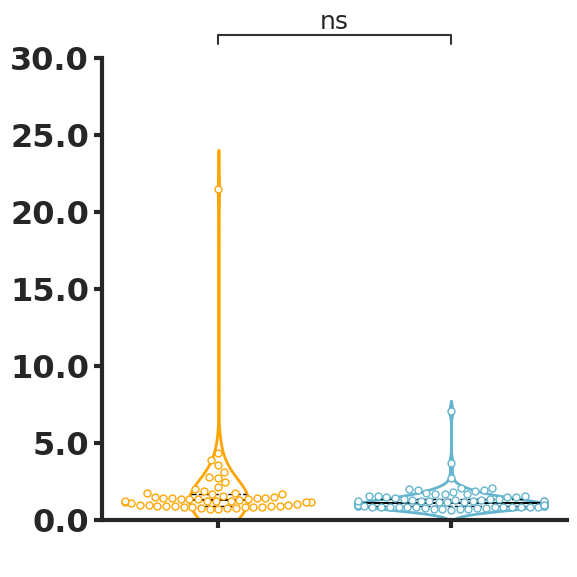

In [90]:
# Lacuranity of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["orange","c"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'IDH_status' , y = 'ed_meanlac',data = IDH,order=["Mutant","WT"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Mutant="White", WT="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'IDH_status' , y = 'ed_meanlac',data = IDH,order=["Mutant","WT"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,30])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "IDH_status"
y1 = "ed_meanlac"
order = ["Mutant","WT"]
add_stat_annotation(ax,data=IDH, x=x1, y=y1,order=order, box_pairs = [("Mutant","WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

#plt.savefig(vp_plot +"IDH_Status_ED_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


### MGMT

In [91]:
MGMT.columns

Index(['ID', 'segmented_id', 'Histology_x', 'Grade', 'Age_years_at_diagnosis',
       'Gender', 'Survival_months', 'Vital_status_1_dead',
       'Karnofsky Performance Score', '1p/19q codeletion',
       ...
       'ncr_net_meanlac', 'ncr_net_medlac', 'ed_meanlac', 'ed_medlac',
       'et_meanlac', 'et_medlac', 'mean_lac', 'med_lac', 'mean_fd', 'med_fd'],
      dtype='object', length=759)

/tmp/ipykernel_24880/3171034397.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


<Axes.ArtistList of 4 collections>


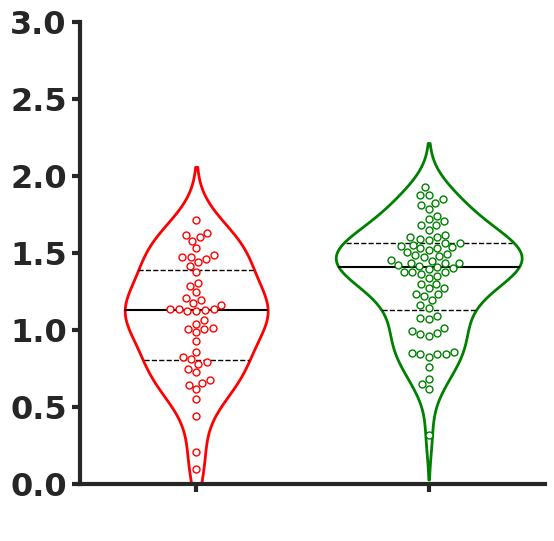

In [92]:
# FD of Necrotic Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])
x1 = "MGMT_promoter_status"
y1 = "ncr_net_meanfd"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_NCR_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


/tmp/ipykernel_24880/2753113516.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


<Axes.ArtistList of 4 collections>


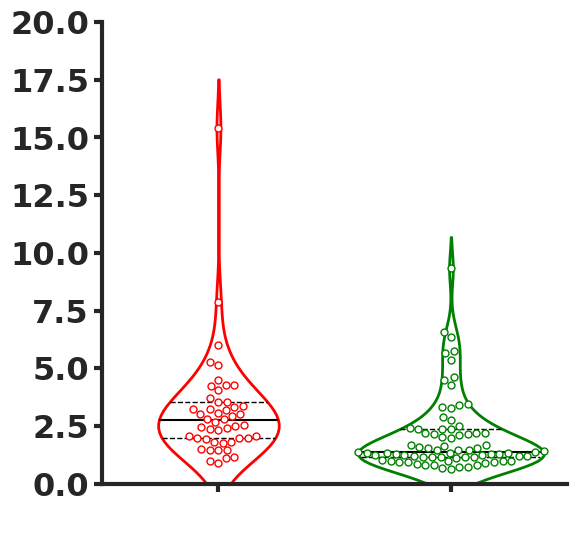

In [93]:
# Lacuranity of Necrotic Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ncr_net_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,20])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "MGMT_promoter_status"
y1 = "ncr_net_meanlac"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_NCR_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


/tmp/ipykernel_24880/2344408810.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


<Axes.ArtistList of 4 collections>


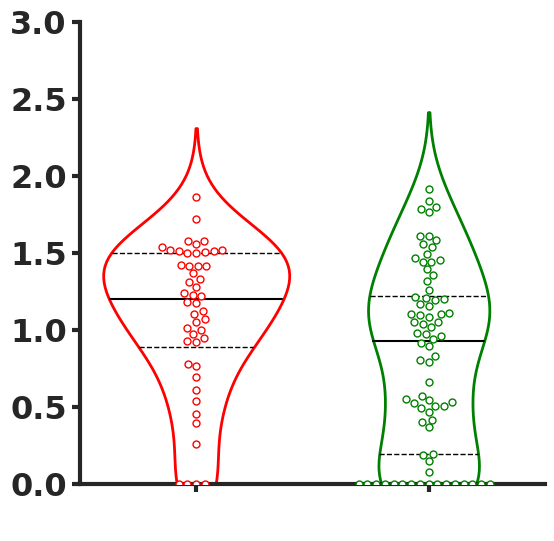

In [94]:
# FD of Enhancing Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'et_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'et_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])
x1 = "MGMT_promoter_status"
y1 = "et_meanfd"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_ET_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


/tmp/ipykernel_24880/3406529272.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


<Axes.ArtistList of 4 collections>


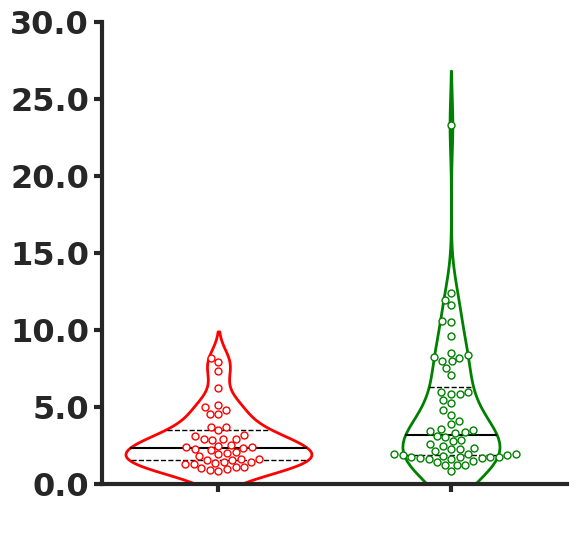

In [95]:
# Lacuranity of Enhancing Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'et_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'et_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,30])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "MGMT_promoter_status"
y1 = "et_meanlac"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_ET_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')


/tmp/ipykernel_24880/398200187.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})
/home/ankit/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes.ArtistList of 4 collections>


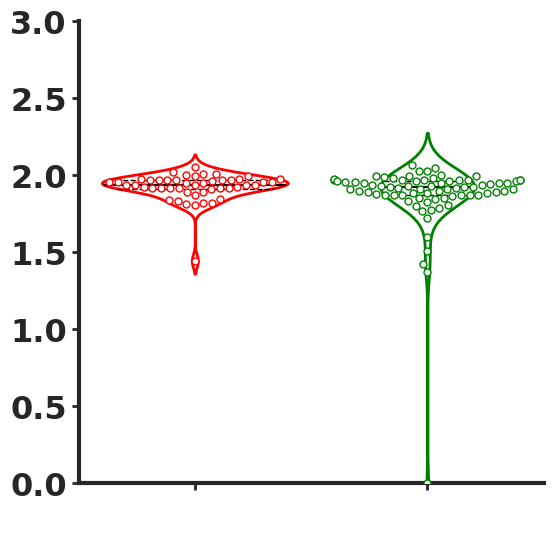

In [96]:
# FD of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ed_meanfd',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ed_meanfd',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=5, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,3])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "MGMT_promoter_status"
y1 = "ed_meanfd"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_ED_FD_violin.tiff", dpi = 300, bbox_inches = 'tight')


/tmp/ipykernel_24880/1902499066.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


<Axes.ArtistList of 4 collections>


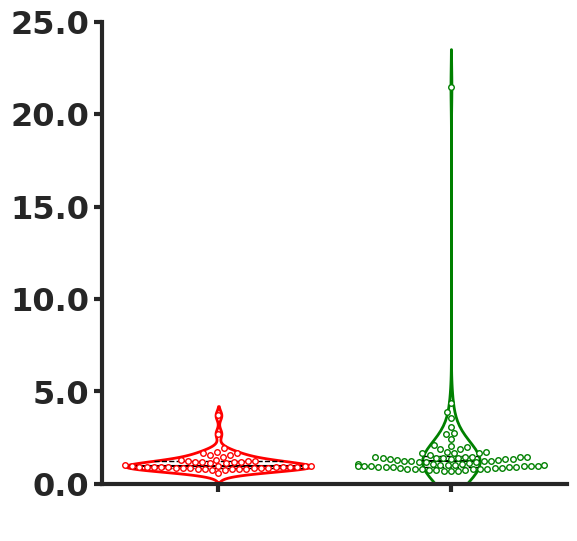

In [97]:
# Lacuranity of Edema Component
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale = 1.5)
sns.set_style(style='white')
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['ytick.left'] = True
rc('axes', linewidth=3)
#palette = ["green","darkred"]

palette = ["red","green"]
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.violinplot(x = 'MGMT_promoter_status' , y = 'ed_meanlac',data = MGMT,order=["Unmethylated","Methylated"],linewidth=2, color="White",\
                dodge = True , showmeans=True ,palette=dict(Unmethylated="White", Methylated="White"),\
                meanprops={"marker":"s", "markersize":1 , "markerfacecolor" : "black" , "markeredgecolor":"black"},inner= "quartile")

sns.swarmplot(x = 'MGMT_promoter_status' , y = 'ed_meanlac',data = MGMT,order=["Unmethylated","Methylated"], linewidth=1, alpha=1,\
              size=4, dodge = True,color = "white")

ax.set_xlabel('', size = 25, weight = "bold")
ax.set_ylabel("", size = 25, weight = "bold")
ax.set_xticklabels([" "," "], size = 25, fontdict = {"weight" : "bold"})
ax.set_ylim([0.0,25])
ax.set_yticklabels(ax.get_yticks(), size = 23, fontdict = {"weight" : "bold"})


for l in ax.lines:
    l.set_linestyle("--")
    l.set_linewidth(1)
    l.set_color("black")
for l in ax.lines[1::3]:
    l.set_linestyle("-")
    l.set_linewidth(1.5)
    l.set_color("black")    

  

print(ax.collections)

plt.setp(ax.collections[0], edgecolor=palette[0])
plt.setp(ax.collections[2], edgecolor=palette[0])
plt.setp(ax.collections[1], edgecolor=palette[1])
plt.setp(ax.collections[3], edgecolor=palette[1])

x1 = "MGMT_promoter_status"
y1 = "ed_meanlac"
order = ["Unmethylated","Methylated"]
#add_stat_annotation(ax,data=MGMT, x=x1, y=y1,order=order, box_pairs = [("Unmethylated","Methylated")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2, comparisons_correction=None)

plt.savefig(vp_plot +"MGMT_Status_ED_lac_violin.tiff", dpi = 300, bbox_inches = 'tight')
